**Aufgabe 1: Lineare Nachbarschaftsfilter**

Ausgabe für filter1:


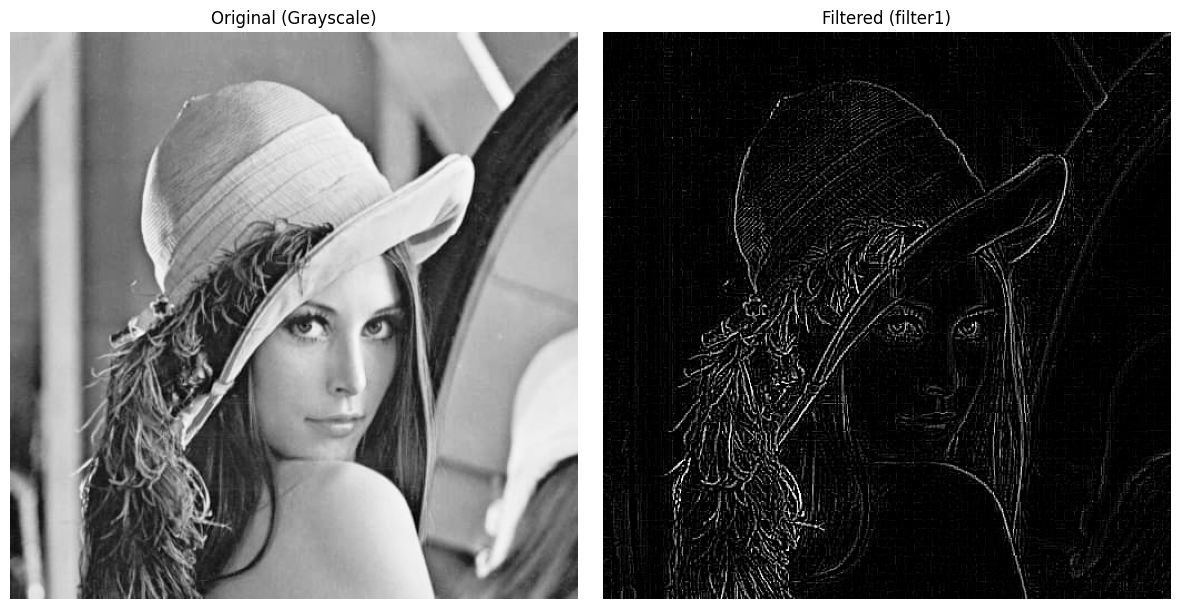


Ausgabe für filter2:


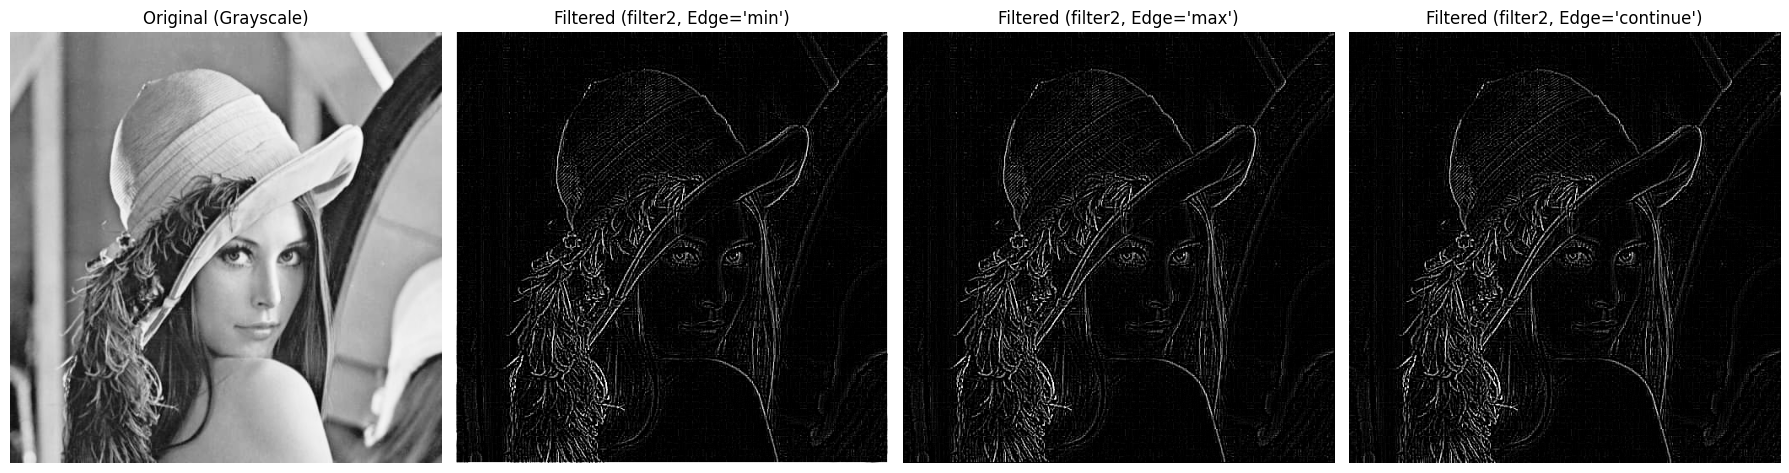


Ausgabe abgeschlossen.


In [3]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from template import filter1, filter2, rgb2gray

# read img
img = io.imread("lena.jpg")  # or any other image

# convert to numpy array
img_np = np.array(img)

# convert to grayscale
img_gray = rgb2gray(img_np)


# LaPlace Filter - Gut geeignet für Kantenhervorhebung
filter_mask = np.array([
     [-1, -1, -1],
     [-1,  8, -1],
     [-1, -1 ,-1]
])


# Schärfungsfilter
# filter_mask = np.array([
#     [0, -1, 0],
#     [-1, 4, -1],
#     [0, -1, 0]
# ])


# Weichzeichnungsfilter
# filter_mask = np.array([
#     [1, 1, 1],
#     [1, -7, 1],
#     [1, 1, 1]
# ])

# Sobel Filter - Kantendetektierung
# filter_mask = np.array([
#     [-1, 0, 1],
#     [-2, 0, 2],
#     [-1, 0, 1]
# ])




# --- Filter 1 ---
img_filtered1 = filter1(img_gray.copy(), filter_mask, 1)

print("Ausgabe für filter1:")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap=cm.Greys_r)
plt.title("Original (Grayscale)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtered1, cmap=cm.Greys_r)
plt.title("Filtered (filter1)")
plt.axis('off')

plt.tight_layout()
plt.show()

# --- Filter 2 ---
img_filtered_min = filter2(img_gray.copy(), filter_mask, 1, 'min')
img_filtered_max = filter2(img_gray.copy(), filter_mask, 1, 'max')
img_filtered_continue = filter2(img_gray.copy(), filter_mask, 1, 'continue')

print("\nAusgabe für filter2:")
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap=cm.Greys_r)
plt.title("Original (Grayscale)")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_filtered_min, cmap=cm.Greys_r)
plt.title("Filtered (filter2, Edge='min')")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_filtered_max, cmap=cm.Greys_r)
plt.title("Filtered (filter2, Edge='max')")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_filtered_continue, cmap=cm.Greys_r)
plt.title("Filtered (filter2, Edge='continue')")
plt.axis('off')

plt.tight_layout()
plt.show()

print("\nAusgabe abgeschlossen.")

4.  *Beantworten Sie folgende Fragen:*

    * a)  Nennen Sie die Arten und Eigenschaften von linearen Filtern. 
        * Lineare Filter sind Filter, bei denen die Operation auf den Pixelwerten linear ist. Das bedeutet, dass die gewichtete Summe der Nachbarpixel berechnet wird.
        * **Arten:**
            * Mittelwertfilter: Glättet das Bild, reduziert Rauschen.
            * Gaußfilter: Glättet stärker als der Mittelwertfilter, gewichtet Pixel nach einer Gaußverteilung.
            * Kantendetektoren (z.B. Sobel, Prewitt): Heben Kanten und Konturen hervor.
    * b)  Was ist der Unterschied zwischen linearen und nichtlinearen Filtern? 
        * Lineare Filter berechnen die Ausgabe als eine lineare Kombination der Eingabepixel. 
        * Nichtlineare Filter berechnen die Ausgabe basierend auf einer nichtlinearen Operation der Eingabepixel. Beispiele sind Medianfilter (ersetzt den zentralen Pixelwert durch den Median der Nachbarschaft) und Max/Min-Filter (ersetzen den zentralen Pixelwert durch das Maximum/Minimum der Nachbarschaft). Nichtlineare Filter können besser bei der Entfernung von Rauschen sein, ohne Kanten so stark zu verwischen wie lineare Filter.

**Aufgabe 2: Nichtlineare Nachbarschaftsfilter**

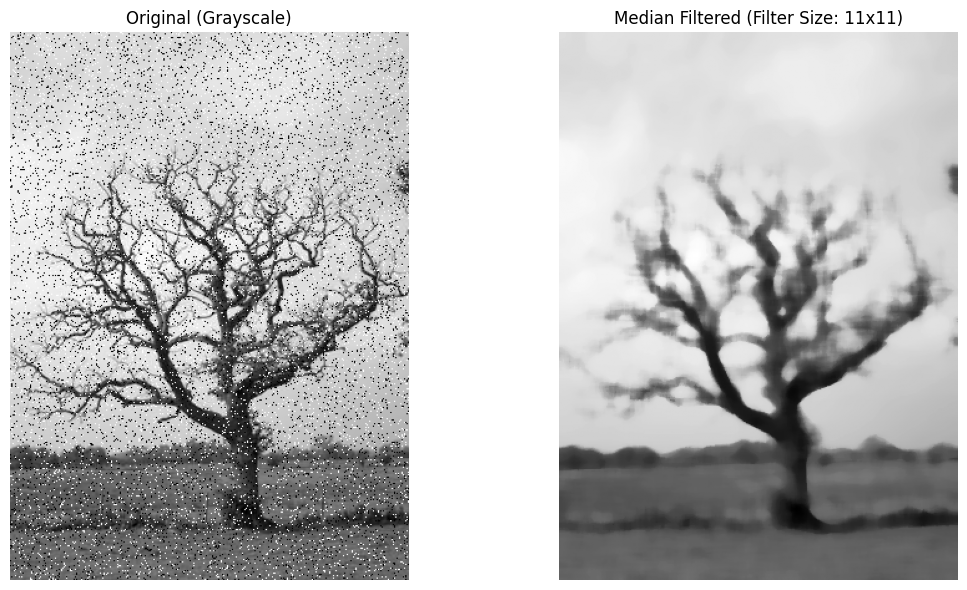

In [ ]:
# Importieren der notwendigen Bibliotheken
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import view_as_windows
import heapq

# Medianfilter-Funktion
def medianFilter(in_image, filter_size, offset):
    """
    Wendet einen Medianfilter auf ein Bild an.

    Args:
        in_image (numpy.ndarray): 8-bit Graustufenbild.
        filter_size (int): Größe des Filters (NxN), wobei N = 2K+1.
        offset (int): Offset (Stride).

    Returns:
        numpy.ndarray: Gefiltertes Bild.
    """
def medianFilter(in_image, filter_size, offset):
    """
    Wendet einen Medianfilter auf ein Bild an.

    Args:
        in_image (numpy.ndarray): 8-bit Graustufenbild.
        filter_size (int): Größe des Filters (NxN), wobei N = 2K+1.
        offset (int): Offset (Stride).

    Returns:
        numpy.ndarray: Gefiltertes Bild.
    """
    assert filter_size % 2 != 0, "Filtergröße muss ungerade sein."
    pad_size = filter_size // 2
    padded_image = np.pad(in_image, pad_size, mode='reflect')
    windows = view_as_windows(padded_image, (filter_size, filter_size), step=offset)

    out_image = np.zeros(windows.shape[0:2], dtype=np.uint8)
    for i in range(windows.shape[0]):
        for j in range(windows.shape[1]):
            # Werte in eine Liste umwandeln und flatten
            window_values = windows[i, j].ravel().tolist()
            heapq.heapify(window_values)  # Erstelle einen Min-Heap
            # berechnet die Position des Medians in einer sortierten Liste
            median_value = heapq.nlargest(filter_size * filter_size // 2 + 1, window_values)[-1]
            out_image[i, j] = median_value

    return out_image

# Bild laden
img = io.imread("tree.png")  # Pfad zum Bild

# Überprüfen, ob das Bild RGB ist (3 Dimensionen) oder bereits Graustufen (2 Dimensionen)
if len(img.shape) == 3:  # RGB-Bild
    img_gray = np.mean(img, axis=2).astype(np.uint8)  # In Graustufen umwandeln
else:  # Bereits Graustufen
    img_gray = img

# Medianfilter anwenden
filter_size = 11
  # Größe des Filters (z. B. 3x3)
offset = 1  # Schrittweite
img_median_filtered = medianFilter(img_gray, filter_size, offset)
img_median_filtered = img_median_filtered.astype(np.uint8)

# Ergebnisse anzeigen
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original (Grayscale)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_median_filtered, cmap='gray')
plt.title(f"Median Filtered (Filter Size: {filter_size}x{filter_size})")
plt.axis('off')

plt.tight_layout()
plt.show()

3.  *Beantworten Sie folgende Fragen:*

    * a)  Vergleichen Sie die Ergebnisse der verschiedenen Filter miteinander und begründen Sie diese. 
        * Im Allgemeinen gilt:
            * Mittelwertfilter glätten das Bild und reduzieren Rauschen, verwischen aber auch Kanten.
            * Gaußfilter glätten ähnlich, aber mit weniger starkem Verwischen von Kanten.
            * Medianfilter sind sehr effektiv bei der Entfernung von Salt-and-Pepper-Rauschen und erhalten Kanten besser als Mittelwertfilter.
    * b)  Warum ist es beim Medianfilter sinnvoll für die Sortierung Heap Sort zu verwenden?
        * Heap Sort ist effizienter für das Finden des Medians als das vollständige Sortieren der Nachbarschaft. Da wir nur den mittleren Wert (Median) benötigen, müssen wir die anderen Werte nicht vollständig sortieren. Heap Sort ermöglicht es, die kleinsten (oder größten) Elemente effizient zu finden, ohne das gesamte Array zu sortieren. Dies ist besonders wichtig, da der Medianfilter für jedes Pixel im Bild angewendet wird.
    * c)  Untersuchen Sie, welche Effekte bei mehrmaligem Anwenden eines Filters auf das jeweilige Ergebnisbild auftreten.
        * Mehrmaliges Anwenden eines Mittelwert- oder Gaußfilters führt zu stärkerer Glättung und weiterem Verlust von Details.
        * Mehrmaliges Anwenden eines Medianfilters kann das Rauschen weiter reduzieren, aber irgendwann ändert sich das Bild nicht mehr wesentlich.
    * d)  Welche Effekte treten bei grossen und bei kleinen Filtermasken auf? 
        * Kleine Filtermasken haben geringere Auswirkungen und verändern das Bild weniger.
        * Grosse Filtermasken haben stärkere Auswirkungen:
            * Mittelwert/Gauß: Stärkere Glättung, mehr Detailverlust.
            * Median: Entfernt größeres Rauschen, kann aber auch mehr Details entfernen.



           1 5 6 
           